In [135]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
df = pd.read_csv("/content/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
X = df.drop(["PassengerId","Survived","Name","SibSp","Parch","Ticket","Cabin","Embarked"],axis=1)
y = df["Survived"]

In [156]:
X.dtypes

,0
Pclass,int64
Sex,object
Age,float64
Fare,float64


In [157]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X["Sex"] = le.fit_transform(X["Sex"])

In [159]:
X.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [167]:
X["Age"] = X["Age"].fillna(X["Age"].mean())

In [173]:
y.value_counts()

,count
Survived,
0,549
1,342


In [170]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_smote , y_smote = smote.fit_resample(X,y)

In [174]:
y_smote.value_counts()

,count
Survived,
0,549
1,549


In [178]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=42,stratify=y_smote)

In [180]:
y_train.value_counts()

,count
Survived,
0,439
1,439


In [181]:
y_test.value_counts()

,count
Survived,
0,110
1,110


In [182]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [183]:
y_pred = model.predict(X_test)

In [184]:
y_pred[:5]

array([0, 1, 1, 1, 0])

In [185]:
y_test.head(5)

,Survived
776,0
944,1
945,1
300,1
115,0


In [187]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[90, 20],
       [14, 96]])

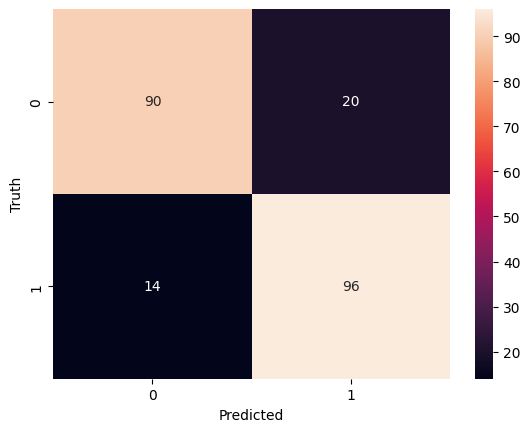

In [188]:
import seaborn as sns

sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [189]:
model.score(X_test,y_test)

0.8454545454545455